In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import paths

# TODO: Deleteme after developing
%load_ext autoreload
%autoreload 2

## Params

In [2]:
ORG_NAME = 'Decentraland'
SPLITS_FREQ = 'W-THU'  # Split weekly
LAST_FOLDS = 10  # Use just last 10 splits
SPLITS_NORMALIZE = True
LAST_FOLD_DATE_STR: str = '2023-07-13'

# Specific to this notebook
MODEL_NAMES = [
    'itemknn',
    'userknn',
    'plnsim',
]
NEEDED_COLS = [
    'time_train',
    'time_rec',
    'time_eval',
]

In [3]:
# Parameters
EXECUTION_ID = "2024-09-04T10:00"
WINDOW_SIZES = ["1d", "7d", "14d"]
PLN_MODEL_NAMES = ["all-MiniLM-L12-v2"]
ORG_NAME = "Aave - Aavegotchi"
SPLITS_FREQ = "5d"
LAST_FOLDS = 10
SPLITS_NORMALIZE = True
LAST_FOLD_DATE_STR = "2023-05-01"


## Read baselines

In [4]:
dfo = paths.load_openpop(ORG_NAME, SPLITS_FREQ, SPLITS_NORMALIZE)
dfo

,precision@1,precision@3,precision@5,precision@10,precision@15,precision@100,ndcg@1,ndcg@3,ndcg@5,ndcg@10,...,recall@10,recall@15,recall@100,r-precision@1,r-precision@3,r-precision@5,r-precision@10,r-precision@15,r-precision@100,time_eval
fold,,,,,,,,,,,,,,,,,,,,,
2019-12-13,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.072594
2019-12-18,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.068956
2019-12-23,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.070587
2019-12-28,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.069808
2020-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.069943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-25,0.244604,0.403968,0.242381,0.121190,0.080794,0.012119,0.244604,0.671489,0.671489,0.671489,...,1.000000,1.0,1.0,0.606061,0.647959,0.647959,0.647959,0.647959,0.647959,0.481886
2023-06-30,0.081764,0.186495,0.209095,0.336932,0.260573,0.039086,0.081764,0.205819,0.246354,0.494057,...,0.794231,1.0,1.0,0.718606,0.448675,0.599503,0.573975,0.573975,0.573975,0.913281
2023-07-05,0.850420,0.312449,0.372031,0.186016,0.124010,0.018602,0.850420,0.563322,0.820263,0.820263,...,1.000000,1.0,1.0,0.505517,0.508689,0.508976,0.508976,0.508976,0.508976,3.529701


In [5]:
dfp = paths.load_perfect(ORG_NAME, SPLITS_FREQ, SPLITS_NORMALIZE)
dfp

,precision@1,precision@3,precision@5,precision@10,precision@15,precision@100,ndcg@1,ndcg@3,ndcg@5,ndcg@10,...,recall@10,recall@15,recall@100,r-precision@1,r-precision@3,r-precision@5,r-precision@10,r-precision@15,r-precision@100,time_eval
fold,,,,,,,,,,,,,,,,,,,,,
2019-12-13,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.073218
2019-12-18,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.072819
2019-12-23,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.071580
2019-12-28,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.072878
2020-01-02,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.071726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-25,1.0,0.403968,0.242381,0.121190,0.080794,0.012119,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.897755,1.000000,1.000000,1.0,1.0,1.0,0.307376
2023-06-30,1.0,0.791303,0.692788,0.390859,0.260573,0.039086,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.441692,0.738258,0.936639,1.0,1.0,1.0,1.238822
2023-07-05,1.0,0.619723,0.372031,0.186016,0.124010,0.018602,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.571956,0.999753,1.000000,1.0,1.0,1.0,4.321402


## Get other model results

In [6]:
x = paths.load_openpop(ORG_NAME, SPLITS_FREQ, SPLITS_NORMALIZE).assign(model_name='openpop')
x

,precision@1,precision@3,precision@5,precision@10,precision@15,precision@100,ndcg@1,ndcg@3,ndcg@5,ndcg@10,...,recall@15,recall@100,r-precision@1,r-precision@3,r-precision@5,r-precision@10,r-precision@15,r-precision@100,time_eval,model_name
fold,,,,,,,,,,,,,,,,,,,,,
2019-12-13,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.072594,openpop
2019-12-18,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.068956,openpop
2019-12-23,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.070587,openpop
2019-12-28,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.069808,openpop
2020-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.069943,openpop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-25,0.244604,0.403968,0.242381,0.121190,0.080794,0.012119,0.244604,0.671489,0.671489,0.671489,...,1.0,1.0,0.606061,0.647959,0.647959,0.647959,0.647959,0.647959,0.481886,openpop
2023-06-30,0.081764,0.186495,0.209095,0.336932,0.260573,0.039086,0.081764,0.205819,0.246354,0.494057,...,1.0,1.0,0.718606,0.448675,0.599503,0.573975,0.573975,0.573975,0.913281,openpop
2023-07-05,0.850420,0.312449,0.372031,0.186016,0.124010,0.018602,0.850420,0.563322,0.820263,0.820263,...,1.0,1.0,0.505517,0.508689,0.508976,0.508976,0.508976,0.508976,3.529701,openpop


In [7]:
def load_all_results_from_suffix(suffix, perfect=False, openpop=True):
    df = pd.concat((
        paths.get_model_results(
            f'{mn}-best-{suffix}', 
            ORG_NAME, 
            SPLITS_FREQ, 
            SPLITS_NORMALIZE
        ).reset_index().set_index('fold').assign(model_name=mn,results_suffix=suffix) for mn in MODEL_NAMES))
    assert not df.empty
    if openpop:
        openpop = paths.load_openpop(ORG_NAME, SPLITS_FREQ, SPLITS_NORMALIZE).assign(model_name='openpop')
        openpop = openpop.loc[df.index.unique()]
        df = pd.concat((df, openpop))
    if perfect:
        df = pd.concat((df, paths.load_perfect(ORG_NAME, SPLITS_FREQ, SPLITS_NORMALIZE).assign(model_name='perfect')))
    return df #.dropna(axis='columns')

_ = load_all_results_from_suffix('test')
print(_.columns)
# _[_['map@15'].isna()]
_

Index(['k', 'window_size', 'fold_t', 'time_train', 'time_rec',
       'open_proposals', 'min_recs', 'avg_recs', 'precision@1', 'precision@3',
       'precision@5', 'precision@10', 'precision@15', 'precision@100',
       'ndcg@1', 'ndcg@3', 'ndcg@5', 'ndcg@10', 'ndcg@15', 'ndcg@100', 'map@1',
       'map@3', 'map@5', 'map@10', 'map@15', 'map@100', 'recall@1', 'recall@3',
       'recall@5', 'recall@10', 'recall@15', 'recall@100', 'r-precision@1',
       'r-precision@3', 'r-precision@5', 'r-precision@10', 'r-precision@15',
       'r-precision@100', 'time_eval', 'model_name', 'results_suffix',
       'rec_users'],
      dtype='object')


,k,window_size,fold_t,time_train,time_rec,open_proposals,min_recs,avg_recs,precision@1,precision@3,...,r-precision@1,r-precision@3,r-precision@5,r-precision@10,r-precision@15,r-precision@100,time_eval,model_name,results_suffix,rec_users
fold,,,,,,,,,,,,,,,,,,,,,
2023-03-22,1.0,14d,2023-03-22,0.204176,2.808040,5.0,1.0,4.412242,0.346980,0.434671,...,0.674338,0.907653,0.910031,0.910031,0.910031,0.910031,0.642445,itemknn,test,NaN
2023-03-27,1.0,1d,2023-03-27,0.023725,0.545236,5.0,1.0,2.888172,0.806452,0.420789,...,0.870044,0.957702,0.986292,0.986292,0.986292,0.986292,0.474173,itemknn,test,NaN
2023-04-01,1.0,1d,2023-04-01,0.006566,0.716728,11.0,1.0,9.171788,0.567039,0.424115,...,0.890421,0.814829,0.834644,0.858021,0.858021,0.858021,2.193944,itemknn,test,NaN
2023-04-06,1.0,1d,2023-04-06,0.011496,1.889420,14.0,2.0,12.274854,0.735380,0.413418,...,0.820132,0.917643,0.920542,0.924925,0.924925,0.924925,2.686121,itemknn,test,NaN
2023-04-11,1.0,1d,2023-04-11,0.002686,0.081579,9.0,1.0,7.932432,0.756757,0.279279,...,0.941071,0.943678,0.950575,0.950575,0.950575,0.950575,0.304934,itemknn,test,NaN
2023-04-16,1.0,7d,2023-04-16,0.073312,1.186623,6.0,1.0,4.960000,0.537000,0.430667,...,0.734171,0.968043,0.969113,0.969419,0.969419,0.969419,0.431845,itemknn,test,NaN
2023-04-21,1.0,7d,2023-04-21,0.043766,11.281627,9.0,1.0,8.929205,0.991530,0.340178,...,0.989094,0.993136,0.994363,0.996829,0.996829,0.996829,3.666857,itemknn,test,NaN
2023-04-26,4.0,7d,2023-04-26,0.034235,13.960208,4.0,1.0,3.904501,0.958173,0.937056,...,0.362936,0.985283,0.986920,0.986920,0.986920,0.986920,5.230372,itemknn,test,NaN
2023-05-01,1.0,7d,2023-05-01,0.083066,1.811741,6.0,1.0,3.650203,0.591517,0.449157,...,0.730566,0.890214,0.897791,0.897925,0.897925,0.897925,0.510500,itemknn,test,NaN


In [8]:
# Using the hparams that optimize the average results
rdf_avg = load_all_results_from_suffix('avg')
# Using the hparams that optimize that fold
rdf_val = load_all_results_from_suffix('val')
# Using the hparams that optimized the previous fold on the next fold (CVTT)
rdf_test = load_all_results_from_suffix('test')
rdf_test

,k,window_size,fold_t,time_train,time_rec,open_proposals,min_recs,avg_recs,precision@1,precision@3,...,r-precision@1,r-precision@3,r-precision@5,r-precision@10,r-precision@15,r-precision@100,time_eval,model_name,results_suffix,rec_users
fold,,,,,,,,,,,,,,,,,,,,,
2023-03-22,1.0,14d,2023-03-22,0.204176,2.808040,5.0,1.0,4.412242,0.346980,0.434671,...,0.674338,0.907653,0.910031,0.910031,0.910031,0.910031,0.642445,itemknn,test,NaN
2023-03-27,1.0,1d,2023-03-27,0.023725,0.545236,5.0,1.0,2.888172,0.806452,0.420789,...,0.870044,0.957702,0.986292,0.986292,0.986292,0.986292,0.474173,itemknn,test,NaN
2023-04-01,1.0,1d,2023-04-01,0.006566,0.716728,11.0,1.0,9.171788,0.567039,0.424115,...,0.890421,0.814829,0.834644,0.858021,0.858021,0.858021,2.193944,itemknn,test,NaN
2023-04-06,1.0,1d,2023-04-06,0.011496,1.889420,14.0,2.0,12.274854,0.735380,0.413418,...,0.820132,0.917643,0.920542,0.924925,0.924925,0.924925,2.686121,itemknn,test,NaN
2023-04-11,1.0,1d,2023-04-11,0.002686,0.081579,9.0,1.0,7.932432,0.756757,0.279279,...,0.941071,0.943678,0.950575,0.950575,0.950575,0.950575,0.304934,itemknn,test,NaN
2023-04-16,1.0,7d,2023-04-16,0.073312,1.186623,6.0,1.0,4.960000,0.537000,0.430667,...,0.734171,0.968043,0.969113,0.969419,0.969419,0.969419,0.431845,itemknn,test,NaN
2023-04-21,1.0,7d,2023-04-21,0.043766,11.281627,9.0,1.0,8.929205,0.991530,0.340178,...,0.989094,0.993136,0.994363,0.996829,0.996829,0.996829,3.666857,itemknn,test,NaN
2023-04-26,4.0,7d,2023-04-26,0.034235,13.960208,4.0,1.0,3.904501,0.958173,0.937056,...,0.362936,0.985283,0.986920,0.986920,0.986920,0.986920,5.230372,itemknn,test,NaN
2023-05-01,1.0,7d,2023-05-01,0.083066,1.811741,6.0,1.0,3.650203,0.591517,0.449157,...,0.730566,0.890214,0.897791,0.897925,0.897925,0.897925,0.510500,itemknn,test,NaN


In [9]:
assert rdf_avg.index.nunique() == rdf_val.index.nunique() == rdf_test.index.nunique()+1

<Axes: xlabel='fold', ylabel='map@10'>

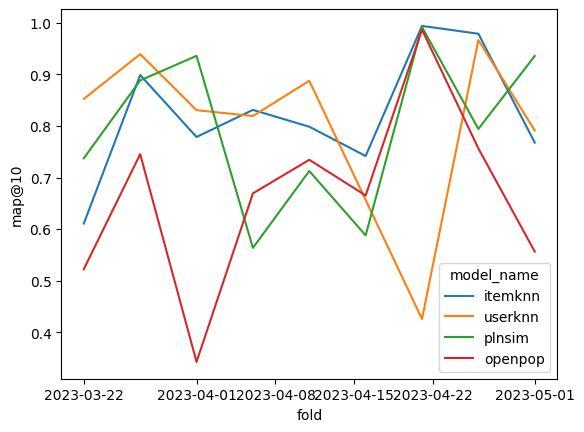

In [10]:
sns.lineplot(rdf_test.reset_index(), x='fold', y='map@10', hue='model_name')

In [11]:
model_suffixes = [
    'avg', # Using the hparams that optimize the average results
    'test', # Using the hparams that optimize that fold
    'valid', # Using the hparams that optimized the previous fold on the next fold (CVTT)
]

In [12]:
paths.get_model_results(MODEL_NAMES[0]+'-best-val', ORG_NAME, SPLITS_FREQ, SPLITS_NORMALIZE)

,,,fold_t,time_train,time_rec,open_proposals,min_recs,avg_recs,precision@1,precision@3,precision@5,precision@10,...,recall@10,recall@15,recall@100,r-precision@1,r-precision@3,r-precision@5,r-precision@10,r-precision@15,r-precision@100,time_eval
fold,k,window_size,,,,,,,,,,,,,,,,,,,,,
2023-03-17,1,14d,2023-03-17,0.196827,3.848087,5,2,4.736057,0.835371,0.558505,0.350313,0.175157,...,1.000000,1.0,1.0,0.606004,0.977470,0.986899,0.986899,0.986899,0.986899,0.878617
2023-03-22,1,1d,2023-03-22,0.002659,0.086634,5,1,3.308642,0.543210,0.382716,0.237037,0.118519,...,1.000000,1.0,1.0,0.888258,0.955674,0.960993,0.960993,0.960993,0.960993,0.332744
2023-03-27,1,1d,2023-03-27,0.023725,0.545236,5,1,2.888172,0.806452,0.420789,0.279140,0.139570,...,1.000000,1.0,1.0,0.870044,0.957702,0.986292,0.986292,0.986292,0.986292,0.474173
2023-04-01,1,1d,2023-04-01,0.006566,0.716728,11,1,9.171788,0.567039,0.424115,0.310894,0.187291,...,0.998429,1.0,1.0,0.890421,0.814829,0.834644,0.858021,0.858021,0.858021,2.193944
2023-04-06,1,1d,2023-04-06,0.011496,1.889420,14,2,12.274854,0.735380,0.413418,0.296296,0.169981,...,0.990903,1.0,1.0,0.820132,0.917643,0.920542,0.924925,0.924925,0.924925,2.686121
2023-04-11,1,7d,2023-04-11,0.110449,1.615714,9,1,6.062630,0.754697,0.445024,0.307307,0.193737,...,1.000000,1.0,1.0,0.737063,0.911237,0.932526,0.951404,0.951404,0.951404,0.375884
2023-04-16,1,7d,2023-04-16,0.073312,1.186623,6,1,4.960000,0.537000,0.430667,0.265200,0.132700,...,1.000000,1.0,1.0,0.734171,0.968043,0.969113,0.969419,0.969419,0.969419,0.431845
2023-04-21,4,7d,2023-04-21,0.044719,11.582482,9,1,8.929205,0.991211,0.340898,0.209828,0.107847,...,1.000000,1.0,1.0,0.989245,0.990452,0.993686,0.996189,0.996189,0.996189,3.842849
2023-04-26,1,7d,2023-04-26,0.037386,13.993475,4,1,3.904501,0.958985,0.937033,0.564318,0.282159,...,1.000000,1.0,1.0,0.363299,0.985588,0.987225,0.987225,0.987225,0.987225,5.347127
